### Desafío - Dimensionalidad y Agrupación (II)

<br>
<br>

Nombre: **Nicolás Gómez**

Profesor: Gabriel Tamayo

Generación: **G2**

* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip

### Desafío 1: Preparación del ambiente de trabajo
Para este desafío trabajaremos de manera conjunta identificando la paleta de colores de carátulas
de álbumes.

* Las imágenes se encuentran en una carpeta con el nombre album_covers

* Cada imagen tiene la siguiente nomenclatura: artista-nombre-del-album.jpg .

El objetivo es generar un método que nos permita identificar la dominancia de una cantidad finita de colores.

Para importar imágenes y visualizarlas, vamos a importar las siguientes librerías:
* Comencemos por incluír las librerías clásicas: pandas , numpy y matplotlib.pyplot .
* sklearn.cluster.KMeans : para extraer los principales componentes de una matriz numérica.
* skimage.io : Para poder ingresar y leer imágenes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skimage.io as io

plt.rcParams["figure.figsize"] = (8, 8)

### Desafío 2: Importación de imagenes
* Comencemos por ingresar una imágen a nuestro ambiente de trabajo. Para ello ocuparemos io.imread . ¿Qué devuelve?

* Para visualizar la imágen en el notebook, ocupe io.imshow .

In [2]:
img_path = 'album_covers/meshuggah-destroy-erase-create.jpg'
img = io.imread(img_path)

In [3]:
img

Array([[[ 15,  22,  15],
        [ 10,  15,   9],
        [  9,   8,   4],
        ...,
        [ 23,  19,  18],
        [ 15,  11,  10],
        [ 14,  10,   9]],

       [[ 11,  18,  11],
        [  7,  12,   6],
        [  6,   7,   2],
        ...,
        [ 21,  19,  20],
        [ 15,  13,  14],
        [ 15,  13,  14]],

       [[  6,  16,   8],
        [  5,  12,   5],
        [  6,   7,   2],
        ...,
        [ 13,  15,  14],
        [  9,  11,  10],
        [  9,  11,  10]],

       ...,

       [[ 93,  36,  16],
        [ 90,  35,  14],
        [ 86,  33,  15],
        ...,
        [171,  91,  64],
        [171,  91,  64],
        [157,  80,  52]],

       [[ 95,  37,  13],
        [ 92,  36,  13],
        [ 90,  35,  15],
        ...,
        [155,  86,  55],
        [154,  85,  54],
        [145,  76,  47]],

       [[ 94,  34,   8],
        [ 91,  33,   9],
        [ 88,  33,  12],
        ...,
        [142,  90,  53],
        [141,  91,  54],
        [132,  82,  47]]

Es una matriz 😮

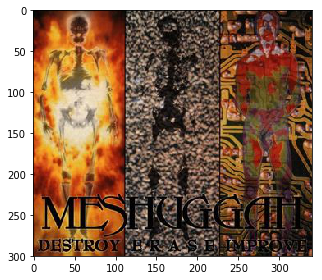

In [4]:
io.imshow(img_path)

### Desafío 3: Preprocesamiento de imágenes y KMeans
* Con la representación numérica de la imágen, vamos a extraer la altura, el ancho y la cantidad de canales (RGB) mediante shape .
* Posteriormente redimensionaremos la imágen con reshape. 
    (Tips: reshape(heigth * width , rgb))
    
* Partamos por inicializar nuestro algoritmo KMeans con un k=8 , ¿Qué significará esto?
* Vuelva a implementar el mismo algoritmo con MiniBatchKMeans . ¿Qué diferencia existe con KMeans ?

In [5]:
height, width, rgb = img.shape

In [6]:
reshaped = img.reshape(height * width, rgb)

In [7]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centroids.
 |  
 |      If an ndarray is passed, it should be of shape (n_clusters, n_features)
 |      and gives the initial centers.
 |  
 |  n_init : int, default: 10
 |      Number of time t

In [8]:
kmeans = KMeans(n_clusters=8, random_state=17072019)

Utilizar `k = 8` significa que el número de clusters será de 8

In [9]:
kmean_results = kmeans.fit_predict(reshaped)

In [10]:
pd.Series(kmeans.labels_).value_counts('%')

5    0.190196
1    0.185353
6    0.176373
0    0.110127
3    0.103598
7    0.098765
2    0.084431
4    0.051157
dtype: float64

In [11]:
from sklearn.cluster import MiniBatchKMeans

mini_batch = MiniBatchKMeans(n_clusters=8, random_state=17072019)
mini_batch_result = mini_batch.fit_transform(reshaped)
pd.Series(mini_batch.labels_).value_counts('%')

0    0.196873
3    0.191853
4    0.176804
7    0.101676
5    0.101314
1    0.091667
2    0.086814
6    0.053000
dtype: float64

El porcentaje de clasificados es parecido, pero la ejecución fue más rápida. En efecto, de la [documentación](https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans), donde dice que este algoritmo es una variación de kmeans que usa subconjuntos de los datos mientras optimiza la misma función.

### Desafío 4: Extracción de valores
* Ahora extraeremos las etiquetas predichas con labels_ . Hasta el momento las etiquetas hacen referencia a cada centroide. Para imputar sentido en éstos, debemos extraer los valores de los centroides.
* Para extraer los centroides (valores característicos), utilicemos el atributo cluster_centers_ .
* Con las etiquetas, generaremos un conteo de ocurrencia con np.unique . Para extraer el conteo, debemos implementar la opción return_counts=True .

In [12]:
clusters1 = kmeans.cluster_centers_
clusters2 = mini_batch.cluster_centers_

In [13]:
labels1 = np.unique(kmeans.labels_, return_counts=True)
labels2 = np.unique(mini_batch.labels_, return_counts=True)

### Desafío 5: Conversión rgb a hex

* Con los centroides, vamos a convertirlos a formato hexadecimal. Vamos a generar una función y la pasaremos con map por cada centroide.

In [14]:
def rgb_to_hex(rgb):
    r, g, b = np.around(rgb)
    return '#%02x%02x%02x' % (int(r), int(g), int(b))

In [15]:
colors1 = list(map(rgb_to_hex, clusters1))
colors1

['#842d12',
 '#190f0a',
 '#e09c3a',
 '#997f6d',
 '#dcc59f',
 '#462f22',
 '#6d5543',
 '#bc6121']

In [16]:
colors2 = list(map(rgb_to_hex, clusters2))
colors2

['#1a100c',
 '#b0521c',
 '#a18a77',
 '#493326',
 '#735a48',
 '#dc8b2d',
 '#e0c597',
 '#7b2410']

### Desafío 6: Definición de base
Ahora generaremos un DataFrame con las siguientes variables:
* El color hex .
* La ocurrencia del color en cada pixel count .
* El porcentaje de ocurrencia de cada color respecto a cluster_centers_ .

Posteriormente ordenaremos los colores de forma descendente por el porcentaje de ocurrencia.

In [17]:
def generate_df(colors, labels):
    df = pd.DataFrame({ 'color': colors, 'count': labels[1], 'rate': labels[1] / sum(labels[1]) })
    return df.sort_values(by='rate')

In [18]:
df1 = generate_df(colors1, labels1)
df1

,color,count,rate
4,#dcc59f,5218,0.051157
2,#e09c3a,8612,0.084431
7,#bc6121,10074,0.098765
3,#997f6d,10567,0.103598
0,#842d12,11233,0.110127
6,#6d5543,17990,0.176373
1,#190f0a,18906,0.185353
5,#462f22,19400,0.190196


In [19]:
df2 = generate_df(colors2, labels2)
df2

,color,count,rate
6,#e0c597,5406,0.053000
2,#a18a77,8855,0.086814
1,#b0521c,9350,0.091667
5,#dc8b2d,10334,0.101314
7,#7b2410,10371,0.101676
4,#735a48,18034,0.176804
3,#493326,19569,0.191853
0,#1a100c,20081,0.196873


### Desafío 7: Visualización

Genere un gráfico de barras donde presente el porcentaje de cada color. Las barras deben estar
coloreadas con el color inferido.

In [20]:
def plot(df):
    return plt.bar(df['color'], df['rate'], color=df['color'])

<BarContainer object of 8 artists>

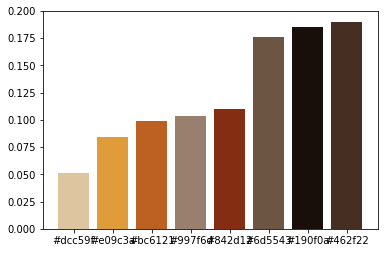

In [21]:
plot(df1)

<BarContainer object of 8 artists>

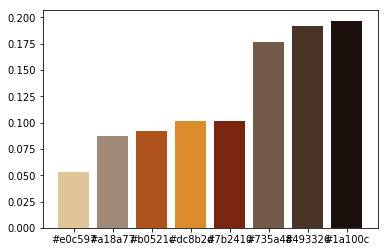

In [22]:
plot(df2)